In [1]:
import pandas as pd
import os
import git
import matplotlib.pyplot as plt
import pickle

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 1000)

In [3]:
## get top git dir
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [4]:
## return the unique selected users (DataFrame) for each year interval 
def get_users(data,sel_users=None):
    years = [2015,2016,2017,2018]
    existing_users = []
    users_final = []
    data["tweetCreatedAt"] = pd.to_datetime(data["tweetCreatedAt"])
    data = data.sort_values(by="tweetCreatedAt")
    for year in years:
        if (sel_users is not None):
            users = (data["userID"].loc[(data.tweetCreatedAt.dt.year == year) & 
                                             (data.userID.isin(sel_users))].unique())
        else:
            users = (data["userID"].loc[(data.tweetCreatedAt.dt.year == year)]) 
        add_users = list(set(users) - set(existing_users))
        users_final.append([year,len(add_users)])
        existing_users.extend(list(set(add_users)))
    users_final = pd.DataFrame(users_final,columns=["year","user_count"])
    return users_final

In [5]:
top_dir = get_git_root(os.getcwd())
input_dir = os.path.join(top_dir,"input")

In [7]:
# juul_data  = pd.read_csv(os.path.join(input_dir,"juul_data.csv"),lineterminator="\n")
weed_data = pd.read_csv(os.path.join(input_dir,"weed_data.csv"),lineterminator="\n")

In [8]:
## growth of poly and mono users
model_dir = os.path.join(get_git_root(os.getcwd()),"models")
poly_dir = os.path.join(model_dir,"poly_users")
poly_users = pickle.load(open(os.path.join(poly_dir,"poly_users.pkl"),"rb"))
regular_users = pickle.load(open(os.path.join(poly_dir,"regular_users.pkl"),"rb"))
mono_users = pickle.load(open(os.path.join(poly_dir,"mono_users.pkl"),"rb"))
datset = pd.read_csv(os.path.join(input_dir,"dataset.csv"),lineterminator="\n")

## growth of users and tweets

In [77]:
# juul_data["tweetCreatedAt"].dt.year
data_growth = juul_data.groupby(by=[juul_data["tweetCreatedAt"].dt.year])["tweetId"].count().reset_index()
data_growth.columns = ["createdAt","count"]
# data_growth["createdAt"] = pd.to_datetime(data_growth["createdAt"])

In [150]:
## looking at only unique users
users_final = get_users(juul_data)

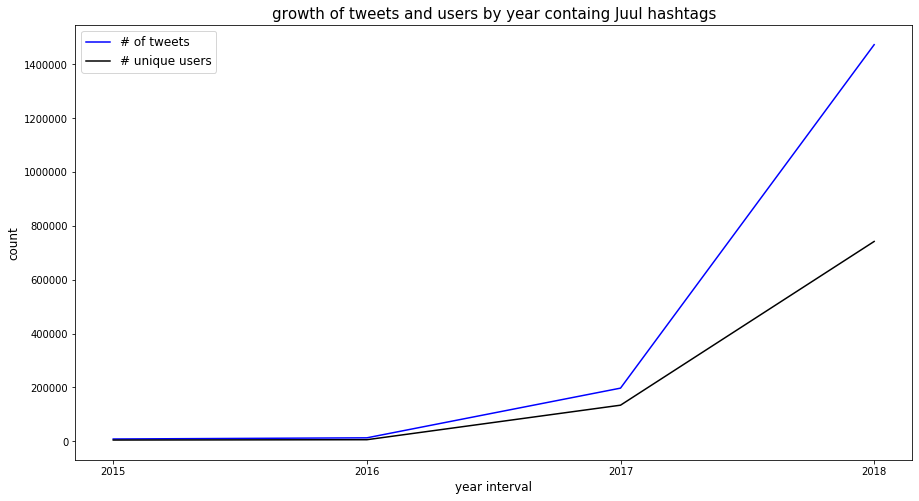

In [165]:
# data_growth = pd.DataFrame(data_growth)
plt.figure(figsize=(15,8))
plt.plot([str(ele) for ele in list(data_growth["createdAt"])],list(data_growth["count"]),label="# of tweets",color='b')
plt.plot([str(ele) for ele in list(users_final.year)],list(users_final["user_count"]),label="# unique users",color='black')
plt.plot()
plt.xlabel("year interval",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title("growth of tweets and users by year containg Juul hashtags",fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [61]:
df_users = get_users(datset,regular_users)

In [59]:
df_poly= get_users(datset,poly_users)

In [60]:
df_mono = get_users(datset,mono_users)

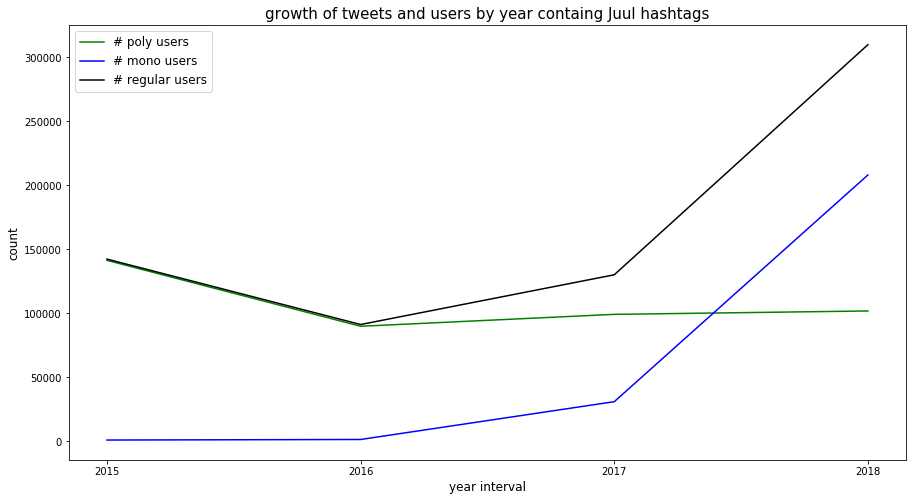

In [65]:
# data_growth = pd.DataFrame(data_growth)
plt.figure(figsize=(15,8))
plt.plot([str(ele) for ele in list(df_poly.year)],list(df_poly["user_count"]),label="# poly users",color='green')
plt.plot([str(ele) for ele in list(df_mono.year)],list(df_mono["user_count"]),label="# mono users",color='blue')
plt.plot([str(ele) for ele in list(df_users.year)],list(df_users["user_count"]),label="# regular users",color='black')
plt.xlabel("year interval",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title("growth of tweets and users by year containg Juul hashtags",fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [17]:
## total cascades for juul data 
len(juul_data.loc[juul_data["retweetCount"] > 0])

1252524

In [9]:
## total cascades for weed data
len(weed_data.loc[weed_data["retweetCount"] > 0])

6079832

In [21]:
weed_data = weed_data[['userID',"tweetCreatedAt",'retweetCount','tweetText',"retweetText","retweeted"]]

In [25]:
weed_data["tweetText"].loc[weed_data["retweeted"] == True] = weed_data["retweetText"].loc[weed_data["retweeted"] == True]

In [29]:
weed_data = weed_data[['userID',"tweetCreatedAt",'retweetCount','tweetText']]

In [32]:
weed_data.to_csv(os.path.join(input_dir,"weed_data_rtcount"),index=False)